IMPORT THE LIBRARIES

In [5]:
#import the libraries
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For advanced visualizations
from wordcloud import WordCloud   # For generating word clouds

import re                # For regular expressions
import string            # For punctuation handling
from collections import Counter  # For word frequency analysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')




LOAD DATA SET

In [9]:
# Load cleaned dataset
import pandas as pd

df = pd.read_csv("CleanedDataset.csv", encoding="latin-1")
df = df.rename(columns={'cleaned_text':'text'})

# Ensure all text entries are strings
df['text'] = df['text'].astype(str)

# Remove empty messages
df = df[df['text'].str.strip() != ""].reset_index(drop=True)
count = df['label'].value_counts()
print(count)



label
1    43910
0    39538
Name: count, dtype: int64


CLASS DISTRIBUTION PLOTS

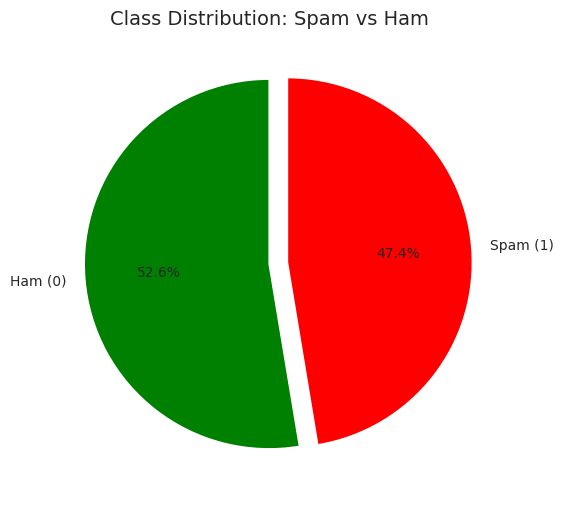

In [41]:
#pie chart
plt.figure(figsize=(6,6))
plt.pie(count, labels=["Ham (0)", "Spam (1)"], autopct='%1.1f%%',
        startangle=90, colors=['green','red'], explode=(0,0.1))
plt.title("Class Distribution: Spam vs Ham", fontsize=14)
plt.show()


/tmp/ipython-input-2306162510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette=['blue','yellow'])


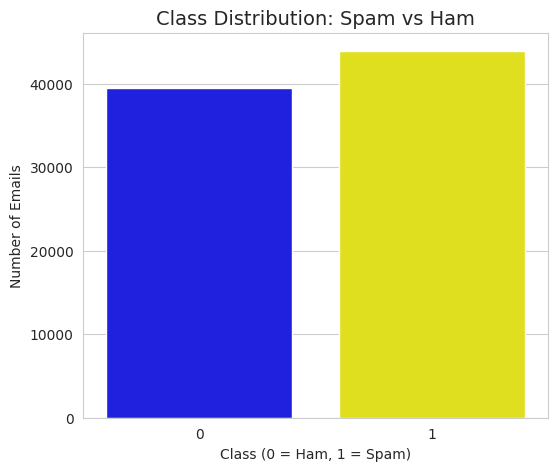

In [44]:
# BAR PLOT

plt.figure(figsize=(6,5))
sns.barplot(x=count.index, y=count.values, palette=['blue','yellow'])
plt.title("Class Distribution: Spam vs Ham", fontsize=14)
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Number of Emails")
plt.show()


/tmp/ipython-input-3541333880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=count.values, palette=['pink','red'])


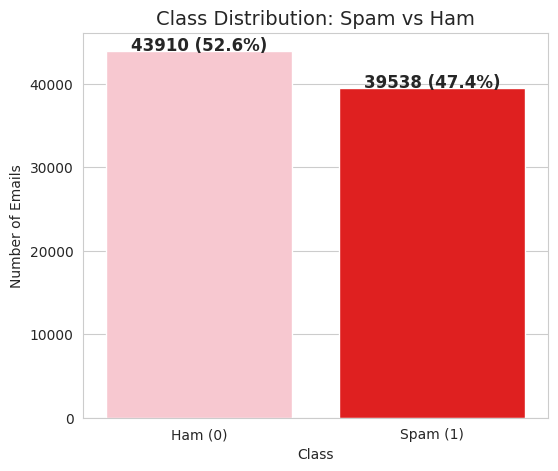

In [46]:
# Count values of spam (1) and ham (0)
count = df['label'].value_counts()
labels = ["Ham (0)", "Spam (1)"]

# Bar Plot with Annotations
# -----------------------
plt.figure(figsize=(6,5))
ax = sns.barplot(x=labels, y=count.values, palette=['pink','red'])

# Add text annotations (counts + percentages)
total = sum(count.values)
for i, v in enumerate(count.values):
    ax.text(i, v + 50, f"{v} ({v/total:.1%})",
            ha='center', fontsize=12, fontweight='bold')

plt.title("Class Distribution: Spam vs Ham", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Number of Emails")
plt.show()


TEXT LENGTH ANALYSIS

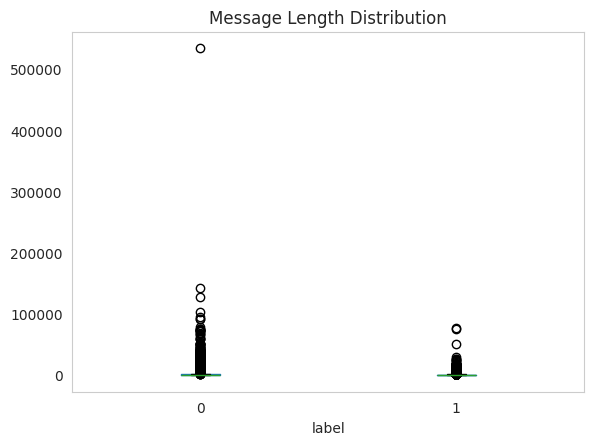

In [12]:
 #BOX PLOT

df['text_length'] = df['text'].apply(len)
df.boxplot(column='text_length', by='label', grid=False)
plt.title("Message Length Distribution")
plt.suptitle("")
plt.show()


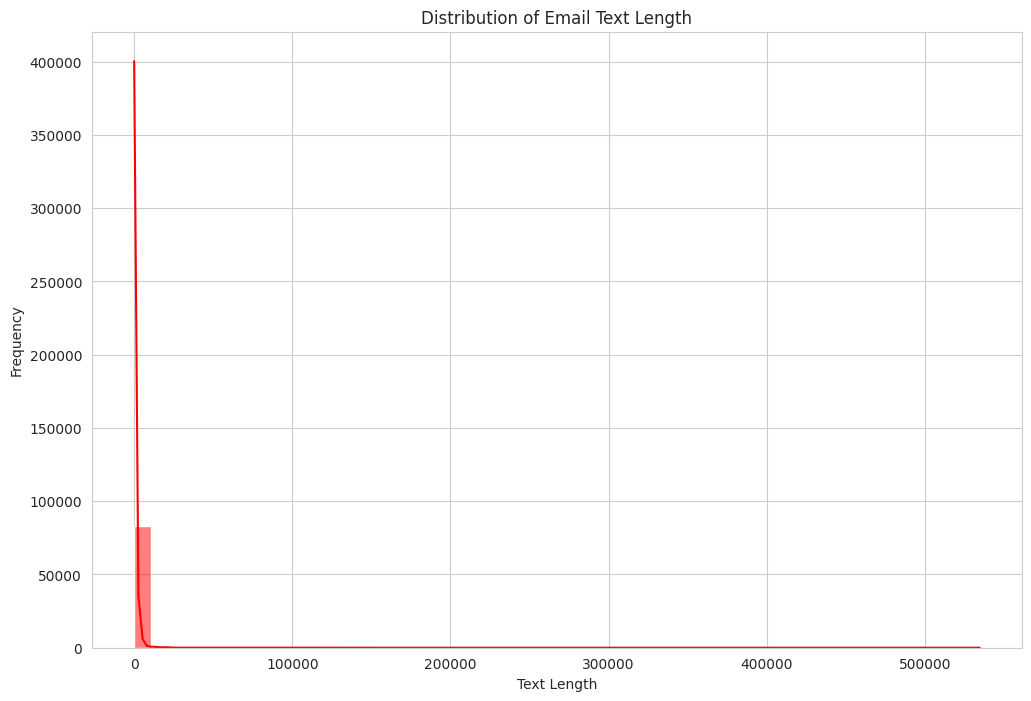

In [49]:
# 1. Histogram of email text length
plt.figure(figsize=(12,8))
sns.histplot(df['text_length'], bins=50, kde=True, color='red')
plt.title('Distribution of Email Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

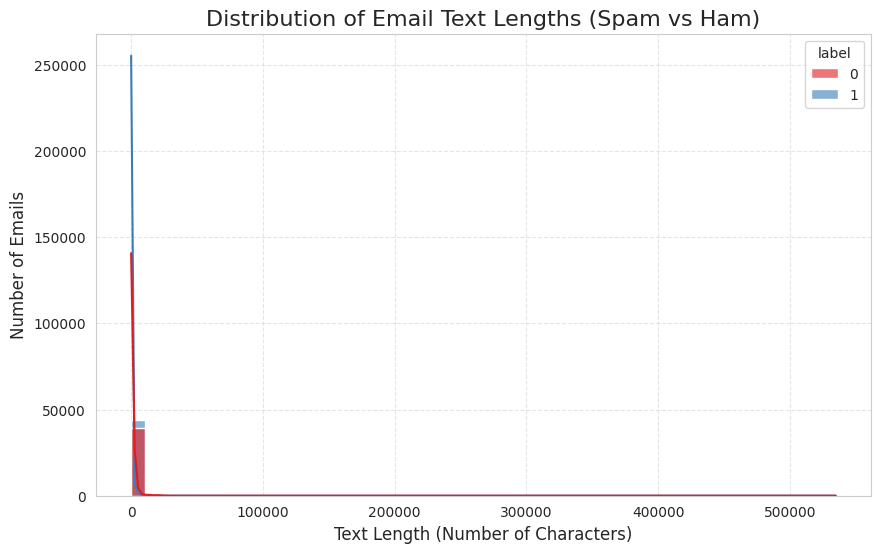

In [24]:
# Enhanced histogram for email text length
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_length', hue='label', bins=50,
             kde=True, palette='Set1', alpha=0.6)
plt.title('Distribution of Email Text Lengths (Spam vs Ham)', fontsize=16)
plt.xlabel('Text Length (Number of Characters)', fontsize=12)
plt.ylabel('Number of Emails', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/tmp/ipython-input-2874280942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['green','red'])


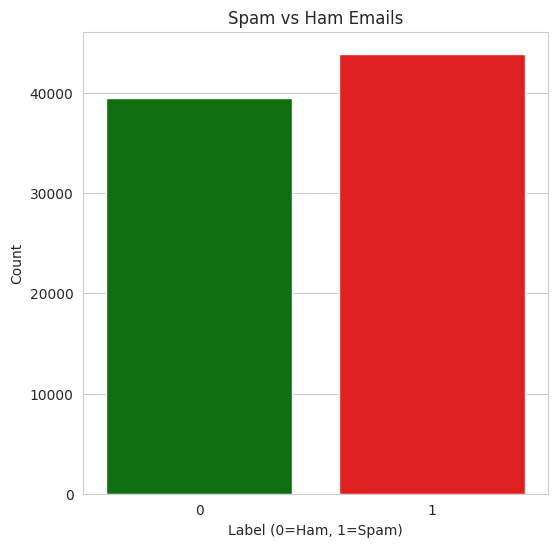

In [54]:
3#. Histogram of spam vs ham
plt.figure(figsize=(6,6))
sns.countplot(x='label', data=df, palette=['green','red'])
plt.title('Spam vs Ham Emails')
plt.xlabel('Label (0=Ham, 1=Spam)')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1801136478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label_str', y='text_length', data=df, palette={'spam':'red','ham':'green'})


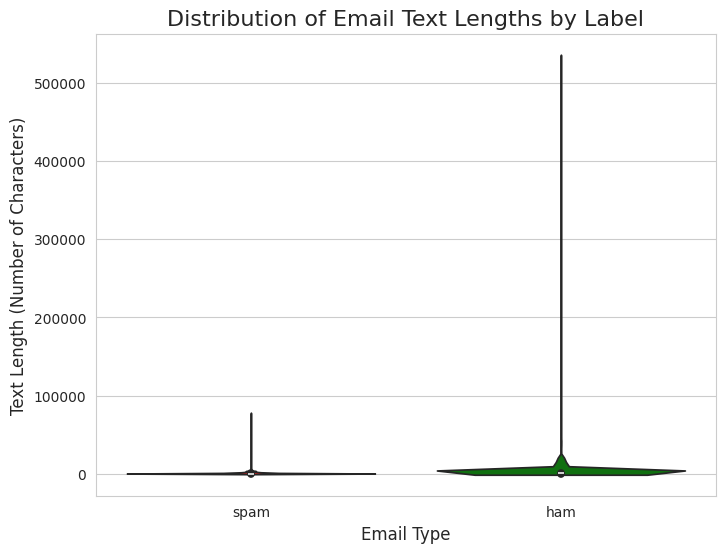

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
df['label_str'] = df['label'].map({0:'ham', 1:'spam'})
plt.figure(figsize=(8,6))
sns.violinplot(x='label_str', y='text_length', data=df, palette={'spam':'red','ham':'green'})
plt.title('Distribution of Email Text Lengths by Label', fontsize=16)
plt.xlabel('Email Type', fontsize=12)
plt.ylabel('Text Length (Number of Characters)', fontsize=12)
plt.show()


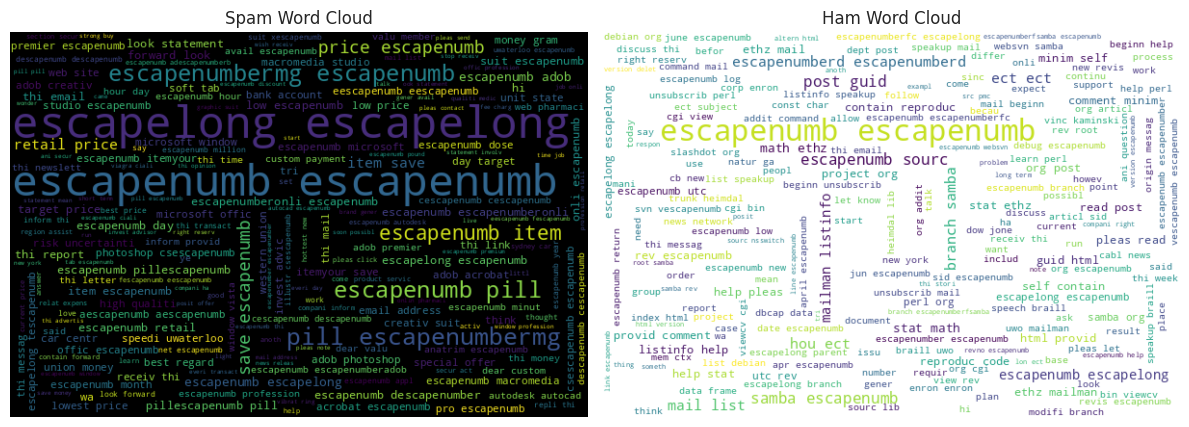

In [37]:
#word clouds
def get_wordcloud_text(messages):
    return " ".join(messages)

spam_text = get_wordcloud_text(df[df['label']==1]['text'])
ham_text = get_wordcloud_text(df[df['label']==0]['text'])

plt.figure(figsize=(12,5))
if spam_text:
    spam_wc = WordCloud(width=600, height=400, background_color='black').generate(spam_text)
    plt.subplot(1,2,1)
    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Spam Word Cloud")

if ham_text:
    ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_text)
    plt.subplot(1,2,2)
    plt.imshow(ham_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Ham Word Cloud")
plt.tight_layout()
plt.show()



PATTERN ANALYSIS

In [28]:
#Pattern Analysis (Digits, Upper, Special)
# ===============================
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))
df['num_upper'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['num_special'] = df['text'].apply(lambda x: sum(c in string.punctuation for c in x))

print("Digit, Uppercase & Special char usage:\n",
      df.groupby('label')[['num_digits','num_upper','num_special']].mean())


Digit, Uppercase & Special char usage:
        num_digits  num_upper  num_special
label                                    
0             0.0        0.0          0.0
1             0.0        0.0          0.0
